# Final Project

Aim:
    
    Recognise text from DVD cases, in an attempt to make a database of titles from the family DVD collection
    
Structure:
    
    Plug words into pretrained language to text model to predict the words
    Save letters in left to write order they appear on DVD box, in rows
    Improve word recognition with image filtering/segmentation/manipulation


In [1]:
#Import necessary modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

import skimage
from skimage import data, filters, io, color
from skimage.feature import peak_local_max
from skimage.transform import rotate, rescale, SimilarityTransform, warp
from skimage import transform

import cv2
import os
from PIL import Image
import pytesseract

from PIL import Image
import sys

import pyocr
import pyocr.builders

np.random.seed(70103)

/Users/thomasribaroff/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Isolate Individual Text Characters

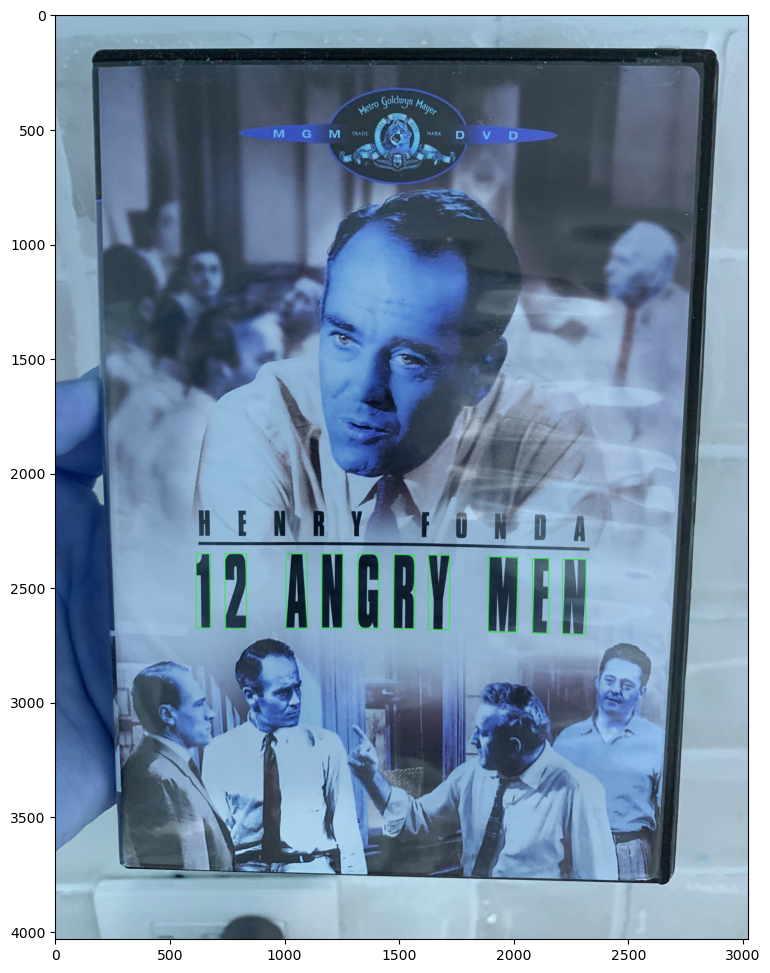

In [2]:
%matplotlib inline

im = cv2.imread('UDA-FinalProject-Data/IMG_2067.jpeg')


imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

#Filter though contours, drawing those which correspond to our letters
num = 0
for contour in contours[6300:6422]:
    
    if cv2.contourArea(contour) > 1500:
        
        #if hierarchy[0][num][3]==0: #if they don't have parents (or if 0 is their parent honestly)
        #cv2.drawContours(im, [contour], 0, (0,255,0), 3) #for perfect fit contours
        x,y,w,h = cv2.boundingRect(contour) #for bounding rectangle contours
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
        roi = im[y:y+h, x:x+w]
        cv2.imwrite("results/12AM_letter{}.jpg".format(num), roi)
        num = num+1


#Show the image with matplotlib
fig = plt.figure(figsize=(12,12))
plt.imshow(im)
plt.show()

Great - small problem though, contouring is not done in the same order in which we read - our saved letters are indexed randomly.

Ideally, we would save the numbers in the order in which we would read them, to make our future coding lives easier. This problem is solved in the code below, with a different image example:

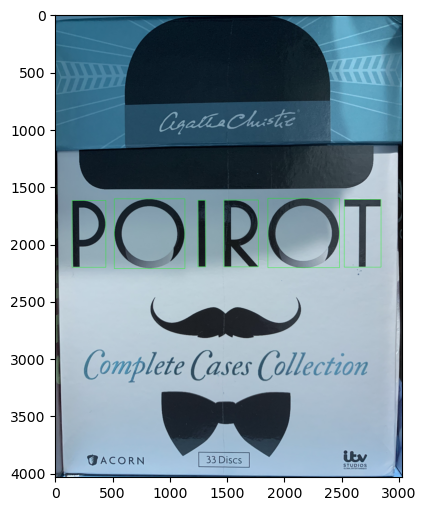

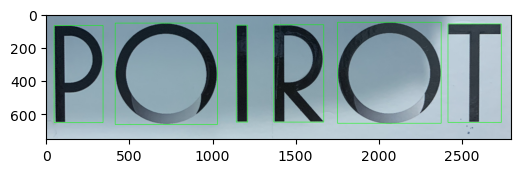

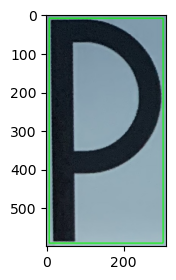

In [3]:
%matplotlib inline

#Bring in image to work with,
original_image = cv2.imread('UDA-FinalProject-Data/IMG_2062.jpeg')

#Pre-prepare image for contour detection
im = original_image[1550:2300, 100:2900] #crop to be just the title
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #convert to greyscale
ret, thresh = cv2.threshold(imgray, 127, 255, 0) #threshold to make image binary

#Perform contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html

contour_centers = []
num = 0

#Filter through all contours, so that we only get letter characters
# and save their center locations, so that we can order them
for contour in contours:
    
    #large contours only
    if cv2.contourArea(contour) > 5000:
        
        #contours without a parent
        if hierarchy[0][num][3]==0:
            
            # compute the center of the contour
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            contour_centers.append((cX,cY))
            
            # Draw bounding rectangle around letter 
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(im,(x-2,y-2),(x+w+2,y+h+2),(0,255,0),2)
    
    num = num + 1
            
    
#sort selected contours in order from left to right as they appear
contour_sorted_centers = sorted(contour_centers , key=lambda k: [k[0], k[1]])

#Filter through all contours, so that we only get letter characters
# and save their center locations, so that we can order them

num=0 #keep track of contour number 

for contour in contours:
    
    #large contours only
    if cv2.contourArea(contour) > 5000:
        
        #contours without a parent
        if hierarchy[0][num][3]==0:
            
            #Draw bounding rectangle around letter
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(im,(x-2,y-2),(x+w+2,y+h+2),(0,255,0),2)
            
            # compute the center of the contour
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            contour_centers.append((cX,cY))

            #compute which index this centre is in our sorted list
            index_in_sorted_centers = contour_sorted_centers.index(((cX,cY)))
        
            #save image of contour rectangle interior with ordered label
            # to enable letters in words to be in order when we save them
            roi = im[y-10:y+h+10, x-10:x+w+10]
            cv2.imwrite("results/poirot_letter{}.jpg".format(index_in_sorted_centers), roi)
            
    num = num+1
            
            
#Show DVD Case as a Whole
fig = plt.figure(figsize=(6,6))
plt.imshow(original_image)
plt.show()
    
#Show DVD Case Title image with contour boxes
fig = plt.figure(figsize=(6,6))
plt.imshow(im)
plt.show()

#Show a character image
im = cv2.imread('results/poirot_letter0.jpg')
fig = plt.figure(figsize=(3,3))
plt.imshow(im)
plt.show()

# Extracting DVD Titles as strings

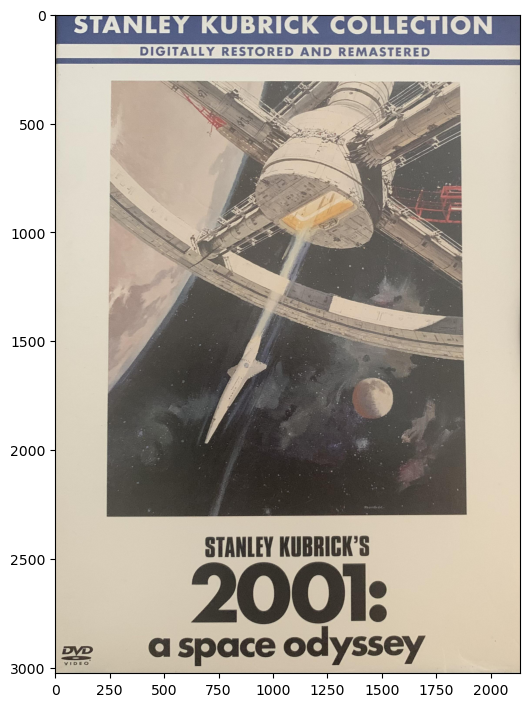

In [4]:
%matplotlib inline
#os.chdir('/Users/thomasribaroff/Desktop')
 
# Read Images
image = mpimg.imread('UDA-FinalProject-Data/IMG_2040.jpeg')
 
# Output Images
fig = plt.figure(figsize=(6,12))
plt.imshow(image)

In [5]:
#use pyocr library tool to scan image for text

tool = pyocr.get_available_tools()[0]

print(tool.image_to_string(
    Image.open('UDA-FinalProject-Data/IMG_2040.jpeg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder()))

STANLEY KUBRICK'S

2001:

oe aspace odysse

VIDEO.


Our tool does a fairly good job - but let's see how it operates on a cleaner version of the text

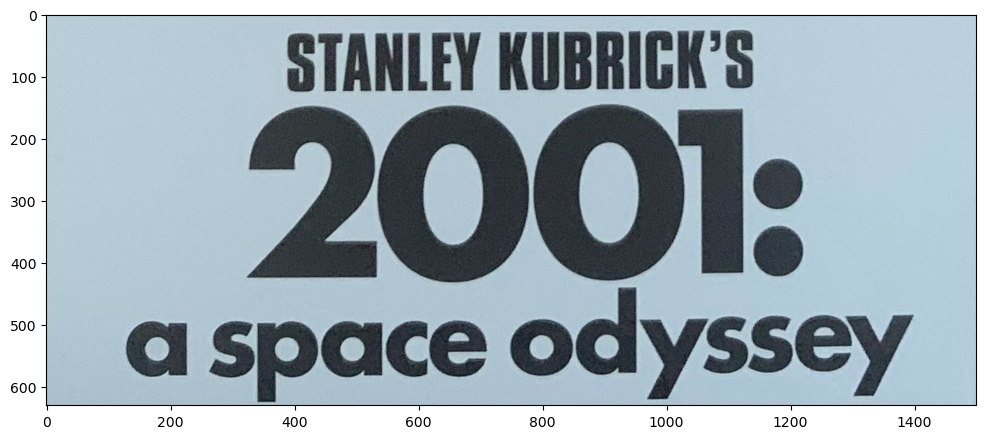

STANLEY KUBRICK'S

200I:

ci space odyssey


In [6]:
#crop image, so it's only the text, without confusing images
im = cv2.imread('UDA-FinalProject-Data/IMG_2040.jpeg')
im = im[2370:3000, 300:1800]

#save image to desktop
cv2.imwrite("results/fulltitle.jpg",im)

#show improved cropped image
fig = plt.figure(figsize=(12,12))
plt.imshow(im)
plt.show()

#Extract Text from image
full_title = tool.image_to_string(
    Image.open('results/fulltitle.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title)

Great! It recognises our text well, but with 2 small character errors.

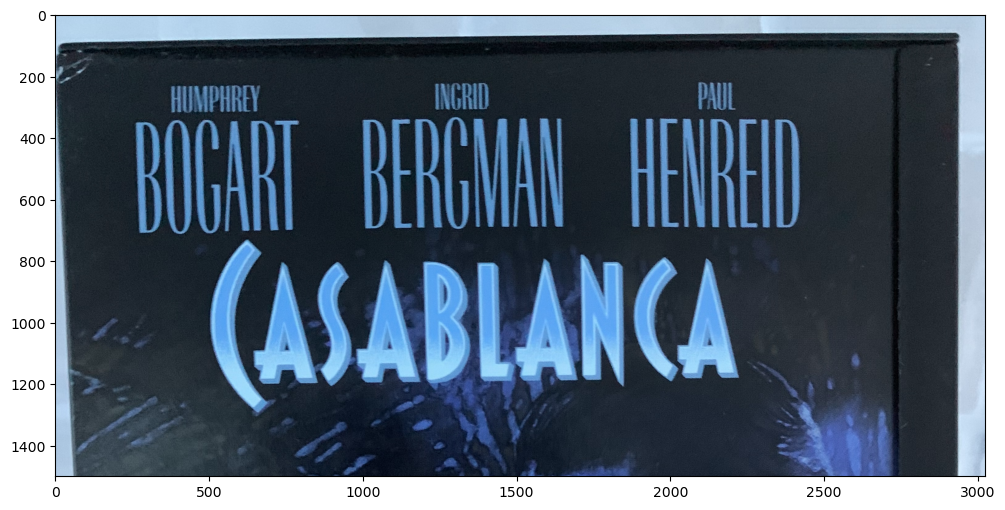

mt \ INGRID Hp

eo il


In [7]:
#crop image, so it's only the text, without confusing images
im = cv2.imread('UDA-FinalProject-Data/IMG_2066.jpeg')
im = im[0:1500,]

#save image to desktop
cv2.imwrite("results/fulltitle.jpg",im)

#show improved cropped image
fig = plt.figure(figsize=(12,6))
plt.imshow(im)
plt.show()

#Extract Text from image
full_title = tool.image_to_string(
    Image.open('results/fulltitle.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title)

On this more complicated example, it is a mess! Odd text font and a confusing backround are making our job harder. We'll look to improve this technique and fix these errors in the next section

# Improving word recognition

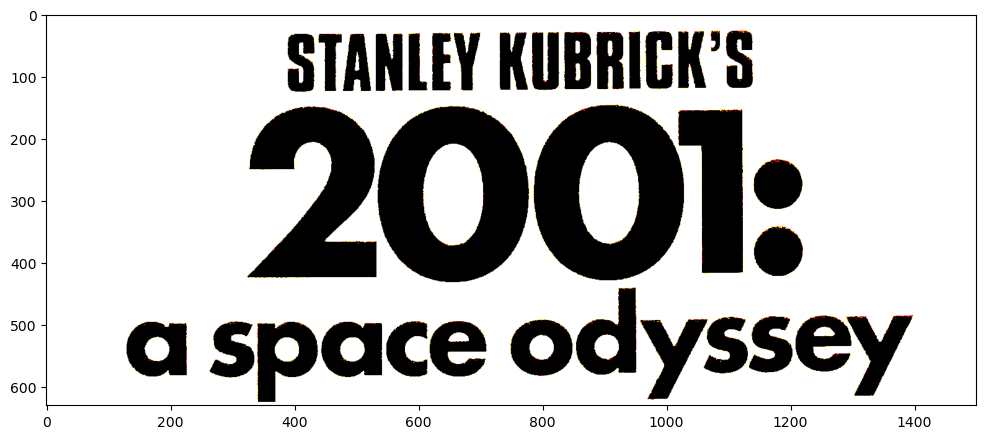

STANLEY KUBRICK'S

2001:

ci space odyssey


In [8]:
#crop image, so it's only the text, without confusing images
im = cv2.imread('UDA-FinalProject-Data/IMG_2040.jpeg')
im = im[2370:3000, 300:1800]

#use image smoothing and thresholding to remove blur and increase contrast
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)[1]
#im = cv2.GaussianBlur(im, (1,1), 0)
im = cv2.bilateralFilter(im,9,100,100) # highly effective in noise removal while keeping edges sharp
#save image to desktop
cv2.imwrite("results/fulltitle_improved.jpg",im)

#show improved cropped image
fig = plt.figure(figsize=(12,12))
plt.imshow(im)
plt.show()

#Extract Text from improved image
full_title_improved = tool.image_to_string(
    Image.open('results/fulltitle_improved.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title_improved)

A small improvement - fixes 1 of our 2 misclassified characters

Now let's try to make some improvements to the Casablanca cover

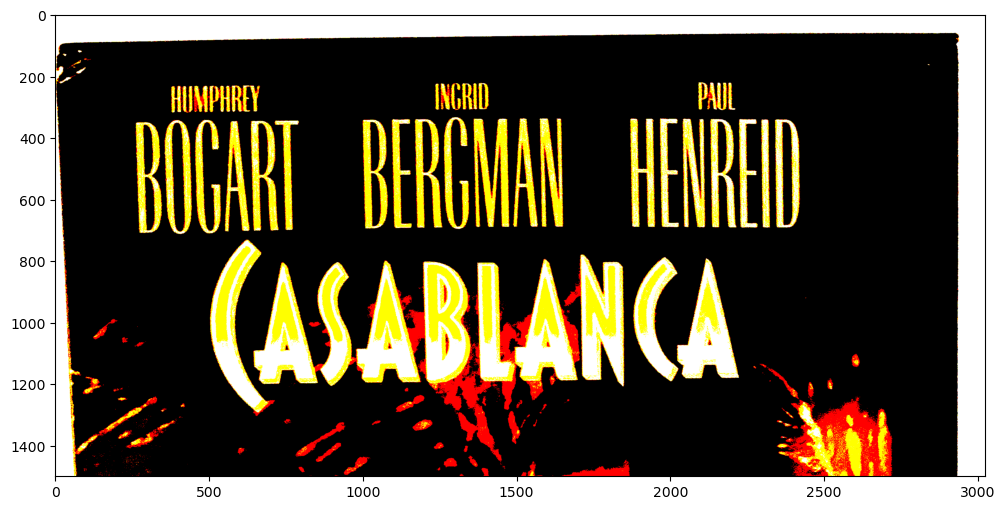

HUMPHREY NGRID PAUL

BOGART BERGA WARE


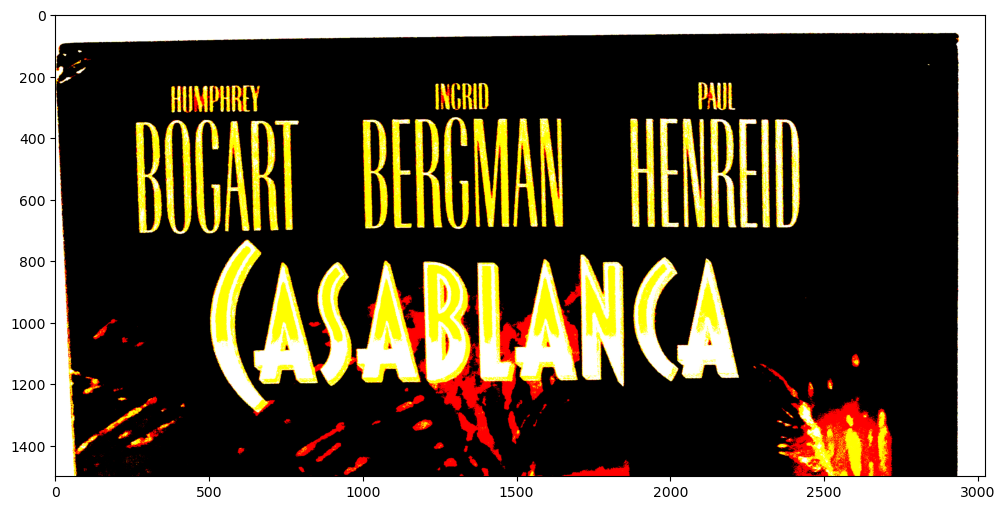

HUMPHREY INGRID PAUL

BOGART BERGMAN WARE


In [17]:
#crop image, so it's only the text, without confusing images
im = cv2.imread('UDA-FinalProject-Data/IMG_2066.jpeg')
im = im[0:1500,]

#use image smoothing and thresholding to remove blur and increase contrast
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)[1]

#save image to desktop
cv2.imwrite("results/fulltitle_improved.jpg",im)

#show improved cropped image
fig = plt.figure(figsize=(12,6))
plt.imshow(im)
plt.show()

#Extract Text from improved image
full_title_improved = tool.image_to_string(
    Image.open('results/fulltitle_improved.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title_improved)

#use a bilateral filter for further improvement
im = cv2.bilateralFilter(im,13,100,100) # highly effective in noise removal while keeping edges sharp

#save image to desktop
cv2.imwrite("results/fulltitle_improved.jpg",im)

#show improved cropped image
fig = plt.figure(figsize=(12,6))
plt.imshow(im)
plt.show()

#Extract Text from improved image
full_title_improved = tool.image_to_string(
    Image.open('results/fulltitle_improved.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title_improved)

Big improvement after using filtering and smoothing - and using the bilateral filter gave us further improvement. 

The Casablanca title is written in such an odd font, and it clouded by imagery behind it, making it very hard to detect the text

Another issue that we run into with text recognisition is orientation - if the text in our image is not in a straight line, it increases the complexity of text extraction.

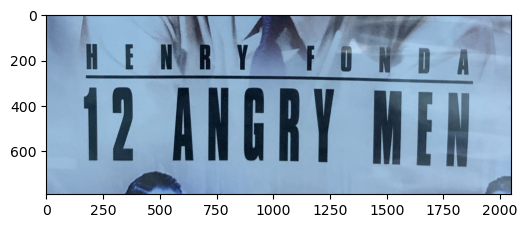

In [10]:
%matplotlib inline

#Read in 12 Angry Men Cover
im = cv2.imread('UDA-FinalProject-Data/IMG_2067.jpeg')
im = im[2030:2820,450:2500]

#Show the image with matplotlib
fig = plt.figure(figsize=(6,6))
plt.imshow(im)
plt.show()

We can see here in our 12 Angry Men DVD case cover, that the text shifts downwards to the right ie the N is lower than the 1. 

Our job is also made harder by the presence of the superimposed image behind the title. 

Let's see what happens when we try our text extraction technique on this cover. 

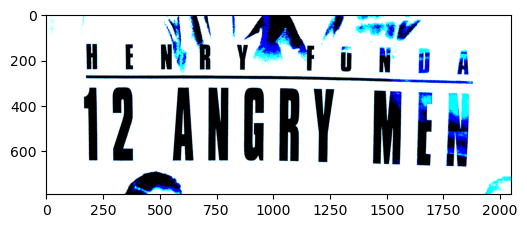

In [11]:
%matplotlib inline

im = cv2.imread('UDA-FinalProject-Data/IMG_2067.jpeg')
im = im[2030:2820,450:2500]

#Repeat our standard pre-processing
norm_img = np.zeros((im.shape[0], im.shape[1]))
img = cv2.normalize(im, norm_img, 0, 255, cv2.NORM_MINMAX)
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
img = cv2.GaussianBlur(img, (1, 1), 0)


#Show the image with matplotlib
fig = plt.figure(figsize=(6,6))
plt.imshow(img)
plt.show()

In [12]:
#save image to desktop
cv2.imwrite("results/fulltitle_improved.jpg",img)

#Extract Text from improved image
full_title_improved = tool.image_to_string(
    Image.open('results/fulltitle_improved.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

print(full_title_improved)

i inant Mia


Not a good job! How about when the image is straighted?

True

<Figure size 640x480 with 0 Axes>

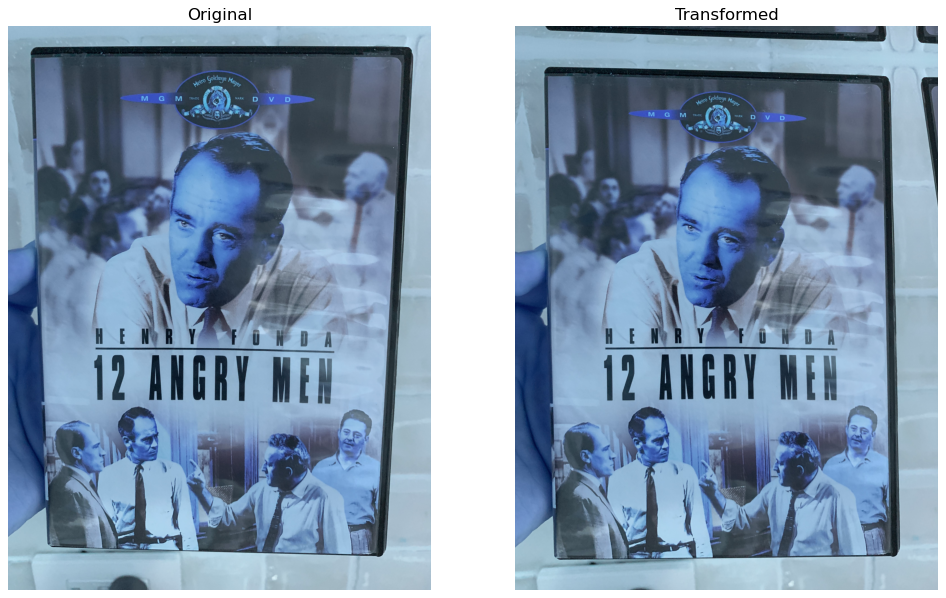

In [13]:
img = cv2.imread('UDA-FinalProject-Data/IMG_2067.jpeg')

#create box around the title
points_of_interest = np.array([[630, 2350], 
                               [2325, 2370], 
                               [2305,2700], 
                               [630, 2670]])


#create box in rectangle shape to warp title box into 
projection = np.array([[650, 2350],
                       [2300, 2350],
                       [2300, 2675],
                       [650,2675]])

# warp title box to fit inside perfect rectangle box
tform = transform.estimate_transform('projective', points_of_interest, projection)
tf_img_warp = transform.warp(img, tform.inverse, mode='symmetric')


#plot box images
plt.figure(num=None, figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(img)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
ax[1].set_axis_off();

#save image to desktop
img = tf_img_warp*255
img = img.astype(np.uint8)
cv2.imwrite("results/fulltitle_straightened.jpg",img)

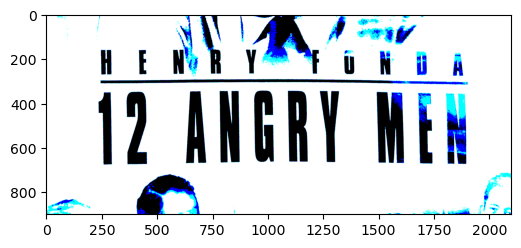

In [18]:
#Repeat Analysis with the straightened image

im = cv2.imread("results/fulltitle_straightened.jpg")
im = im[2000:2900,400:2500]

#Standard Preprocessing
norm_img = np.zeros((im.shape[0], im.shape[1]))
img = cv2.normalize(im, norm_img, 0, 255, cv2.NORM_MINMAX)
img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
img = cv2.GaussianBlur(img, (1, 1), 0)

#Show the image with matplotlib
fig = plt.figure(figsize=(6,6))
plt.imshow(img)
plt.show()

#save image to desktop
cv2.imwrite("results/fulltitle_improved_straightened.jpg",img)

#Extract Text from improved image
full_title_improved_straightened = tool.image_to_string(
    Image.open('results/fulltitle_improved_straightened.jpg'),
    lang="eng",
    builder=pyocr.builders.TextBuilder())

#Saved result to save us rerunning code
full_title_improved_straightened = "12 ANGRY Nia"

In [19]:
print(full_title_improved_straightened)

12 ANGRY Nia


This is a marked improvement again on our analysis. It is not perfect, but it is a good beginners attempt, and enough to make me want to explore computer vision techniques much more!